In [71]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import math

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
data =  pd.read_csv("../train.csv", parse_dates=['summary_date']) # 애초에 datatime 유형의 데이터를 읽어 올 때부터 형변환하기
data_label =  pd.read_csv("../train_label.csv")
label_dict =  dict([(i,a) for i,a in zip(data_label['SAMPLE_EMAIL'], data_label['DIAG_NM'])])
data['DIAG_NM'] = data['EMAIL'].map(label_dict)

In [3]:
drop_cols = ['timezone',
             'activity_class_5min', 'activity_met_1min',
             'sleep_hr_5min', 'sleep_hypnogram_5min', 'sleep_rmssd_5min',
             'sleep_is_longest', 'sleep_temperature_trend_deviation', 'sleep_total', 'sleep_temperature_deviation']

convert_cols = data.iloc[:, 60:65].columns

processed_data = data.drop(drop_cols, axis=1).copy()
processed_data = processed_data.drop(convert_cols, axis=1).copy()

processed_data = processed_data.drop('summary_date', axis=1).copy()

In [4]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV

input_data = processed_data.copy()
input_data = input_data.drop("EMAIL", axis = 1)
input_data_y = input_data['DIAG_NM'].copy()
input_data_X = input_data.drop(['DIAG_NM'], axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
input_data_y = le.fit_transform(list(input_data_y))

In [6]:
##scale 

In [7]:
tr_val_X1, test_X1, tr_val_y1, test_y1 = train_test_split(
    input_data_X, 
    input_data_y, 
    test_size = 0.2, 
    random_state = 42,
    shuffle=True,
    stratify = input_data_y # Classification 중요 option
)

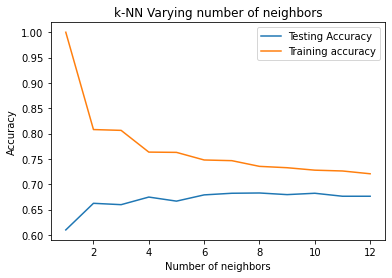

In [8]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,13)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(tr_val_X1, tr_val_y1)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(tr_val_X1, tr_val_y1)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_X1, test_y1) 
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(tr_val_X1, tr_val_y1)
knn.score(test_X1, test_y1)

0.6827438370846731

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

pred_knn = knn.predict(test_X1)
print(classification_report(test_y1, pred_knn))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      1194
           1       0.63      0.29      0.40       129
           2       0.57      0.28      0.38       543

    accuracy                           0.68      1866
   macro avg       0.64      0.49      0.52      1866
weighted avg       0.66      0.68      0.65      1866



## scaling 적용해보자

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [13]:
Rscaler = RobustScaler()
result1 = Rscaler.fit_transform(input_data_X)
pd.options.display.float_format = '{:.3f}'.format
input_data_X_scaled1 = pd.DataFrame(result1, columns=input_data_X.columns)

In [16]:
# train/ test data 로 split 
tr_val_X2, test_X2, tr_val_y2, test_y2 = train_test_split(
    input_data_X_scaled1, 
    input_data_y, 
    test_size = 0.2, 
    random_state = 42,
    shuffle=True,
    stratify = input_data_y # Classification 중요 option
)

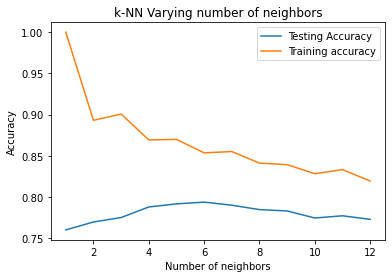

In [17]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,13)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(tr_val_X2, tr_val_y2)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(tr_val_X2, tr_val_y2)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_X2, test_y2) 
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(tr_val_X2, tr_val_y2)
knn.score(test_X2, test_y2)

0.7936763129689175

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

pred_knn = knn.predict(test_X2)
print(classification_report(test_y2, pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1194
           1       0.86      0.53      0.65       129
           2       0.77      0.58      0.66       543

    accuracy                           0.79      1866
   macro avg       0.81      0.68      0.72      1866
weighted avg       0.79      0.79      0.78      1866



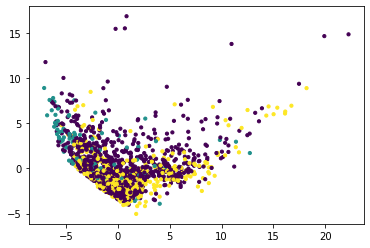

In [95]:
test_X2 = test_X2.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

test_pca = PCA(n_components=2).fit_transform(test_X2)
test_pca = pd.DataFrame(test_pca) 
test_pca["target"] = pd.DataFrame(test_y2) 

plt.scatter(test_pca[0], test_pca[1], c=test_pca["target"], s=10)
plt.show()

C:\Users\drago\AppData\Local\Temp/ipykernel_26888/103245055.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=-150, azim=110)


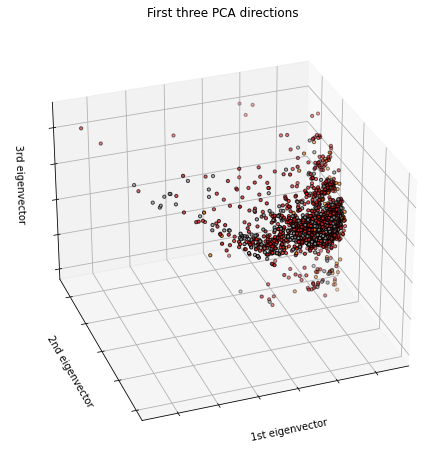

In [96]:
test_X2 = test_X2.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

test_pca = PCA(n_components=3).fit_transform(test_X2)
test_pca = pd.DataFrame(test_pca) 
test_pca["target"] = pd.DataFrame(test_y2) 

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(test_pca[0], test_pca[1], test_pca[2], c=test_pca["target"],
           cmap=plt.cm.Set1, edgecolor='k', s=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [100]:
from sklearn.metrics import pairwise_distances

D = pairwise_distances(test_X2)

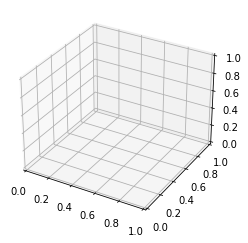

In [108]:
X = test_X2
mds = MDS(n_components = 3 , dissimilarity='precomputed', random_state=0).fit_transform(D)
ax = plt.axes(projection = '3d')

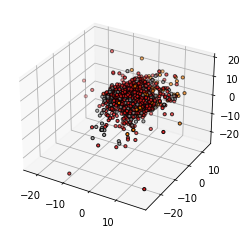

In [114]:
mds = pd.DataFrame(mds) 
mds["target"] = pd.DataFrame(test_y2) 
ax = plt.axes(projection = '3d')
ax.scatter(mds[0], mds[1], mds[2], c=mds["target"],cmap=plt.cm.Set1, edgecolor='k', s=10)
plt.show()

In [85]:
stress = mds.stress_
print(stress)
dist_manhattan = manhattan_distances(X)
mds = MDS(n_components = 3 , dissimilarity='precomputed', random_state=0)
# Get the embeddings
X_transform_L1 = mds.fit_transform(dist_manhattan)

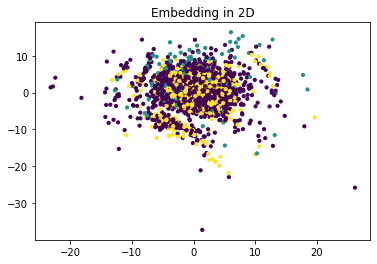

In [97]:
test_pca = pd.DataFrame(X_transform) 
test_pca["target"] = pd.DataFrame(test_y2) 

ax = fig.add_subplot(122)
plt.scatter(test_pca[0], test_pca[1], s=10, c=test_pca["target"])
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)

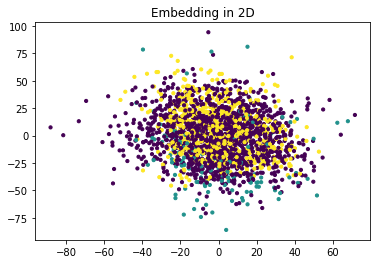

In [98]:
test_pca = pd.DataFrame(X_transform_L1) 
test_pca["target"] = pd.DataFrame(test_y2) 

ax = fig.add_subplot(122)
plt.scatter(test_pca[0], test_pca[1], s=10, c=test_pca["target"])
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

## 사람끼리 묶어고 Scale 해보자

In [ ]:
#사람 별로 묶기
group_pd  = processed_data.groupby(processed_data["EMAIL"])
group_pd = group_pd.mean()
group_pd['DIAG_NM'] = group_pd.index.map(label_dict)
group_pd = group_pd.reset_index()
group_pd = group_pd.drop('EMAIL', axis = 1).copy()

In [ ]:
input_data_y = group_pd['DIAG_NM'].copy()
input_data_X = group_pd.drop(['DIAG_NM'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
input_data_y = le.fit_transform(list(input_data_y))

In [ ]:
Rscaler = RobustScaler()
result = Rscaler.fit_transform(input_data_X)
pd.options.display.float_format = '{:.3f}'.format
input_data_X_scaled = pd.DataFrame(result, columns=input_data_X.columns)

In [ ]:
# train/ test data 로 split 
tr_val_X3, test_X3, tr_val_y3, test_y3 = train_test_split(
    input_data_X_scaled, 
    input_data_y, 
    test_size = 0.2, 
    random_state = 42,
    shuffle=True,
    stratify = input_data_y # Classification 중요 option
)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,17)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model
    knn.fit(tr_val_X3, tr_val_y3)
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(tr_val_X3, tr_val_y3)
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_X3, test_y3) 
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(tr_val_X3, tr_val_y3)
knn.score(test_X3, test_y3)

## 시각화

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [ ]:
data = pd.concat(input_data_X_scaled1, input_data_y)

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()